<a href="https://colab.research.google.com/github/Dimisz/tensorflow_projects/blob/main/time_series/bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data

Data downloaded from https://www.coindesk.com/price/bitcoin/ on September 14, 2021

For the CSV file used in the project, [see the GitHub repo](https://raw.githubusercontent.com/Dimisz/tensorflow_projects/main/time_series/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv).

In [1]:
!wget https://raw.githubusercontent.com/Dimisz/tensorflow_projects/main/time_series/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv

--2021-10-09 00:41:34--  https://raw.githubusercontent.com/Dimisz/tensorflow_projects/main/time_series/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167143 (163K) [text/plain]
Saving to: ‘BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv’

BTC_USD_2014-11-04_ 100%[===================>] 163.23K  --.-KB/s    in 0.03s   

2021-10-09 00:41:35 (5.53 MB/s) - ‘BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv’ saved [167143/167143]



### Read the data to a DataFrame using pandas

In [2]:
import pandas as pd

#Read the data, parse the date column and assign it to be the index
df = pd.read_csv("/content/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv",
                 parse_dates=['Date'],
                 index_col=['Date'])

In [3]:
df.head(), len(df)

(           Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
 Date                                      ...                               
 2014-11-04      BTC            324.71833  ...       332.75133      323.06333
 2014-11-05      BTC            332.45666  ...       335.81166      320.93333
 2014-11-06      BTC            336.58500  ...       341.49000      328.56166
 2014-11-07      BTC            346.77500  ...       351.57500      336.02833
 2014-11-08      BTC            344.81166  ...       351.29500      339.86000
 
 [5 rows x 5 columns], 2507)

In [4]:
# Check if there are any missing values
df.isna().sum()

Currency               0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

### Create a new dataframe we'll be working with.
* We'll just keep the closing price (and data as an index column).
* `Closing Price (USD)` column willl be renamed to `Price`

In [5]:
btc_df = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)": "Price"})
btc_df.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


### Visualize the bitcoin prices.

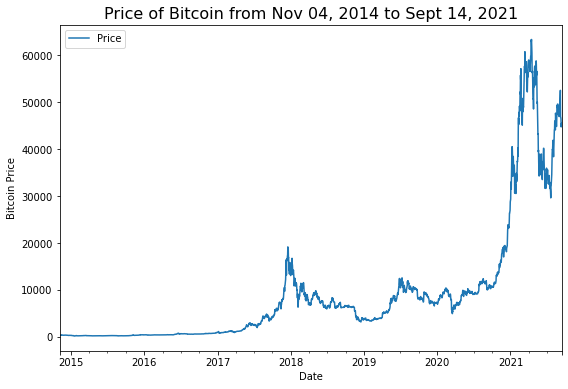

In [10]:
import matplotlib.pyplot as plt
btc_df.plot(figsize=(9,6))
plt.ylabel("Bitcoin Price")
plt.title("Price of Bitcoin from Nov 04, 2014 to Sept 14, 2021", fontsize=16);

### Read in the data with python's CSV module

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price= []

with open("/content/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #skip the first line (column titles)
  for line in csv_reader:
    #get the dates in date format (convert from string to date)
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) 
    #get the closing price as float
    btc_price.append(float(line[2]))


In [11]:
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 11, 4, 0, 0),
  datetime.datetime(2014, 11, 5, 0, 0),
  datetime.datetime(2014, 11, 6, 0, 0),
  datetime.datetime(2014, 11, 7, 0, 0),
  datetime.datetime(2014, 11, 8, 0, 0),
  datetime.datetime(2014, 11, 9, 0, 0),
  datetime.datetime(2014, 11, 10, 0, 0),
  datetime.datetime(2014, 11, 11, 0, 0),
  datetime.datetime(2014, 11, 12, 0, 0),
  datetime.datetime(2014, 11, 13, 0, 0)],
 [324.71833,
  332.45666,
  336.585,
  346.775,
  344.81166,
  343.065,
  358.50166,
  368.07666,
  376.99666,
  442.10666])

### Plot from CSV

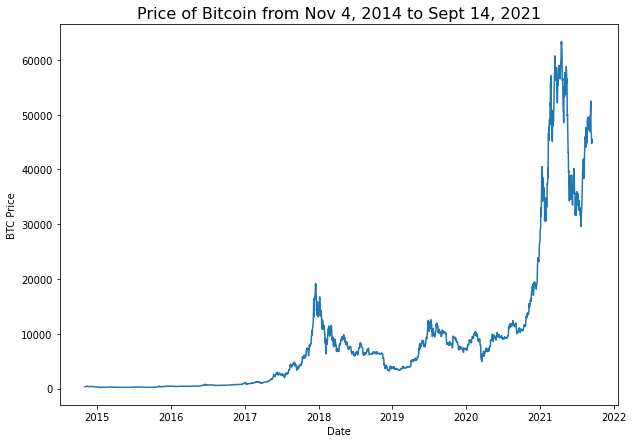

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from Nov 4, 2014 to Sept 14, 2021", fontsize=16)
plt.xlabel("Date");

## Format Data

### Create, Train and Test sets of our Time Series Data